# CNN을 사용하여 Cat & Dogs Classification

In [1]:
import os
import shutil

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models

#### Original Dataset Path

In [2]:
# 현재 경로
original_dataset_dir = './datasets/train'

#### Small Dataset Path

In [3]:
base_dir = './datasets/cats_and_dogs_small'

In [4]:
if os.path.exists(base_dir):  # os.path.exists() 해당경로가 있다면
    shutil.rmtree(base_dir)   # shutil.rmtree)() 해당경로 삭제
    
os.mkdir(base_dir) # os.mkdir 디렉토리 생성

#### Train, Validation, Test data

In [5]:
## train 
train_dir = os.path.join(base_dir, 'train') # os.path.join: 경로합치기
os.mkdir(train_dir)

## validation
validation_dir = os.path.join(base_dir, 'validation') # os.path.join: 경로합치기
os.mkdir(validation_dir)

## test
test_dir = os.path.join(base_dir, 'test') # os.path.join: 경로합치기
os.mkdir(test_dir)

#### Create folders for cat & dog dataset

In [6]:
# train
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)

os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

### File Copy

#### 1. Train

In [7]:
#### cat train data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    # 원본 경로
    src = os.path.join(original_dataset_dir, fname)
    
    # 복사할 경로
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)  # shutil.copyfile: 경로합치기
    
#### dog train data copy    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    # 원본 경로
    src = os.path.join(original_dataset_dir, fname)
    
    # 복사할 경로
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)  # shutil.copyfile: 경로합치기

#### 2. Validation

In [8]:
#### cat validation data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    # 원본 경로
    src = os.path.join(original_dataset_dir, fname)
    
    # 복사할 경로
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)  # shutil.copyfile: 경로합치기
    
#### dog validation data copy    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    # 원본 경로
    src = os.path.join(original_dataset_dir, fname)
    
    # 복사할 경로
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)  # shutil.copyfile: 경로합치기

#### 3. Test

In [9]:
#### cat test data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    # 원본 경로
    src = os.path.join(original_dataset_dir, fname)
    
    # 복사할 경로
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)  # shutil.copyfile: 경로합치기
    
#### dog test data copy    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    # 원본 경로
    src = os.path.join(original_dataset_dir, fname)
    
    # 복사할 경로
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)  # shutil.copyfile: 경로합치기

In [10]:
print('Train cat images: ', len(os.listdir(train_cats_dir)))
print('Train dog images: ', len(os.listdir(train_dogs_dir)))

print('Validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Validation dog images: ', len(os.listdir(validation_dogs_dir)))

print('Test cat images: ', len(os.listdir(test_cats_dir)))
print('Test dog images: ', len(os.listdir(test_dogs_dir)))

Train cat images:  1000
Train dog images:  1000
Validation cat images:  500
Validation dog images:  500
Test cat images:  500
Test dog images:  500


### Build Network

In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation= 'relu', input_shape= (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [12]:
from tensorflow.keras import optimizers

model.compile(optimizer= 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

### Data Preprocessing

In [13]:
# Image Scaling
from keras.preprocessing.image import ImageDataGenerator

train_data_gen= ImageDataGenerator(rescale= 1./255) #
test_data_gen = ImageDataGenerator(rescale= 1./255) # 

train_generator = train_data_gen.flow_from_directory( train_dir,
                                                     target_size= (150,150),
                                                     batch_size= 20,
                                                     class_mode = 'binary')

validation_generator = test_data_gen.flow_from_directory( validation_dir,
                                                   target_size= (150,150),
                                                   batch_size= 20,
                                                   class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
for data_batch, labels_batch in train_generator:
    print('Batch Data Size: ', data_batch.shape)
    print('Batch Label Size: ', labels_batch.shape)
    break

Batch Data Size:  (20, 150, 150, 3)
Batch Label Size:  (20,)


In [15]:
len(train_generator)

100

In [16]:
history  = model.fit_generator(
    train_generator,
    steps_per_epoch= 100,
    epochs= 30,
    validation_data= validation_generator,
    validation_steps= 50
)

Epoch 1/30


C:\Users\user\AppData\Local\Temp\ipykernel_2456\7750353.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history  = model.fit_generator(


100/100 [==============================] - 39s 386ms/step - loss: 0.7157 - accuracy: 0.5040 - val_loss: 0.6893 - val_accuracy: 0.5300
Epoch 2/30
100/100 [==============================] - 33s 326ms/step - loss: 0.6942 - accuracy: 0.5465 - val_loss: 0.6729 - val_accuracy: 0.6140
Epoch 3/30
100/100 [==============================] - 32s 325ms/step - loss: 0.6739 - accuracy: 0.5925 - val_loss: 0.6356 - val_accuracy: 0.6600
Epoch 4/30
100/100 [==============================] - 32s 324ms/step - loss: 0.6343 - accuracy: 0.6530 - val_loss: 0.6537 - val_accuracy: 0.6080
Epoch 5/30
100/100 [==============================] - 32s 324ms/step - loss: 0.5599 - accuracy: 0.7070 - val_loss: 0.6971 - val_accuracy: 0.6170
Epoch 6/30
100/100 [==============================] - 33s 325ms/step - loss: 0.5485 - accuracy: 0.7420 - val_loss: 0.6146 - val_accuracy: 0.7000
Epoch 7/30
100/100 [==============================] - 32s 324ms/step - loss: 0.4665 - accuracy: 0.7865 - val_loss: 0.6083 - val_accuracy: 0.7

#### 파일저장

In [17]:
model.save('cats_and_dogs_small_1.0.h5')

### Evaluate the model

C:\Users\user\AppData\Local\Temp\ipykernel_2456\2641017262.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label= 'Validation Accuracy', c='red')
C:\Users\user\AppData\Local\Temp\ipykernel_2456\2641017262.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b-', label= 'Validation Loss', c='red')


Text(0.5, 1.0, 'Training and Validation Loss')

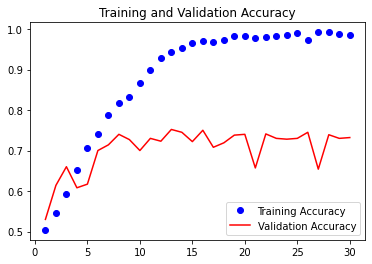

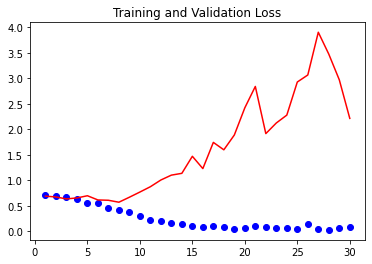

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label= 'Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label= 'Validation Accuracy', c='red')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label= 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label= 'Validation Loss', c='red')
plt.title('Training and Validation Loss')

### 새로운 Generator

In [19]:
data_gen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

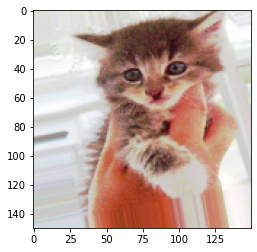

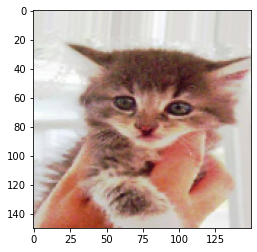

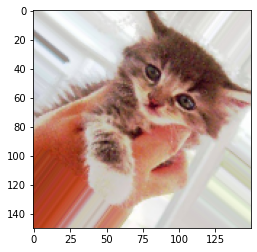

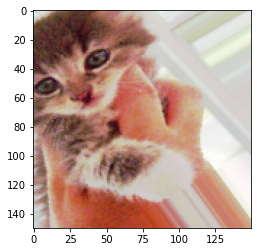

In [20]:
from tensorflow.keras.preprocessing import image

# 파일목록 가져오기
fnames = sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150) )
img

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in data_gen.flow(x, batch_size= 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break

plt.show()

In [21]:
train_datagen = ImageDataGenerator(    
    rescale=1./255,    
    rotation_range=40,    
    width_shift_range=0.2,    
    height_shift_range=0.2,    
    shear_range=0.2,    
    zoom_range=0.2,    
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

## 증식
train_generator = train_datagen.flow_from_directory(        
    # 타깃 디렉터리        
    train_dir,        
    # 모든 이미지를 150 × 150 크기로 바꿉니다        
    target_size=(150, 150),        
    batch_size=32,        
    # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다        
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(        
    validation_dir,       
    target_size=(150, 150),    
    batch_size=32,        
    class_mode='binary')

history = model.fit_generator(      
    train_generator,     
    steps_per_epoch=100,
    epochs=100,
    validation_data= validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


C:\Users\user\AppData\Local\Temp\ipykernel_2456\1456839782.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 35s 342ms/step - loss: 0.7861 - accuracy: 0.6315 - val_loss: 0.6298 - val_accuracy: 0.7080


C:\Users\user\AppData\Local\Temp\ipykernel_2456\1867298494.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label= 'Validation Accuracy', c='red')
C:\Users\user\AppData\Local\Temp\ipykernel_2456\1867298494.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b-', label= 'Validation Loss', c='red')


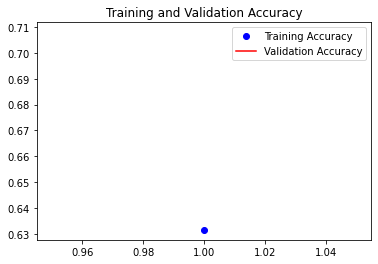

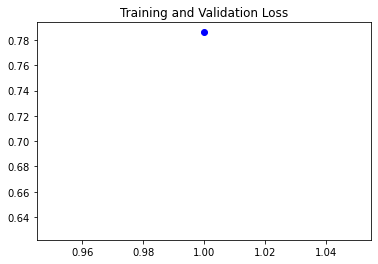

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label= 'Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label= 'Validation Accuracy', c='red')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label= 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label= 'Validation Loss', c='red')
plt.title('Training and Validation Loss')

plt.show()

In [23]:
history.history

{'loss': [0.7860829830169678],
 'accuracy': [0.6315000057220459],
 'val_loss': [0.6297519207000732],
 'val_accuracy': [0.7080000042915344]}